In [1]:
# Imports
import numpy as np
import plotting_master as pm
import run

# -- Parameters --
number_of_companies = 50
number_of_workers = 5 * number_of_companies 
salary_increase = 0.035
interest_rate_free = 0.0 # "variable" or float
mutation_magnitude = 0.1 # Float, "spread", "last_T"
salary_min = mutation_magnitude * 0.1
prob_exponent = 1
warmup_steps = 3100
time_steps = 10000 + warmup_steps 
seed = 999 # np.random.randint(0, 10000)

# Bankruptcy: negative_money, cannot_pay_salary
# mutation: "constant", "spread", "last_T", "minimum", "log", "mean", "worker_opinion", "0_to_mean", "normal", "positive_income"
update_methods = {"worker_update": "limited", 
                  "bankruptcy": "negative_money",
                  "mutation": "positive_income",}


# Create instances
create_data = run.RunWorkForce(number_of_companies, number_of_workers, salary_increase, 
                            interest_rate_free, mutation_magnitude, prob_exponent, salary_min, update_methods, time_steps, seed)
gname = create_data._get_group_name()
plotter = pm.PlotMaster(gname, skip_values=warmup_steps)

### Store values

In [5]:
create_data.store_data_in_group()

Storing data in Steps13100_N50_W250_ds0.035_m0.1_rf0.0_alpha1_smin0.010000000000000002_seed999


100%|██████████| 13099/13099 [00:04<00:00, 3062.84it/s]


### Density graphs

In [ ]:
plotter.add_file_name_to_figure_name = False
plotter.plot_running_KDE(bandwidth_s=0.005, bandwidth_d=0.15, s_lim=(0.000, 0.3), d_lim=(0.001, 2), eval_points=200, kernel="epanechnikov", show_mean=False, plot_debt=False)
# normale bandwidth: 0.0005, 0.15

In [ ]:
plotter.single_KDE(x_data="delta_debt", time_point=70, eval_points=200, bandwidth=0.045, kernel="epanechnikov")

### General behaviour

In [ ]:
plotter.plot_salary(show_spread=False)

In [ ]:
plotter.plot_debt()

In [ ]:
plotter.plot_single_companies(N_plot=6)

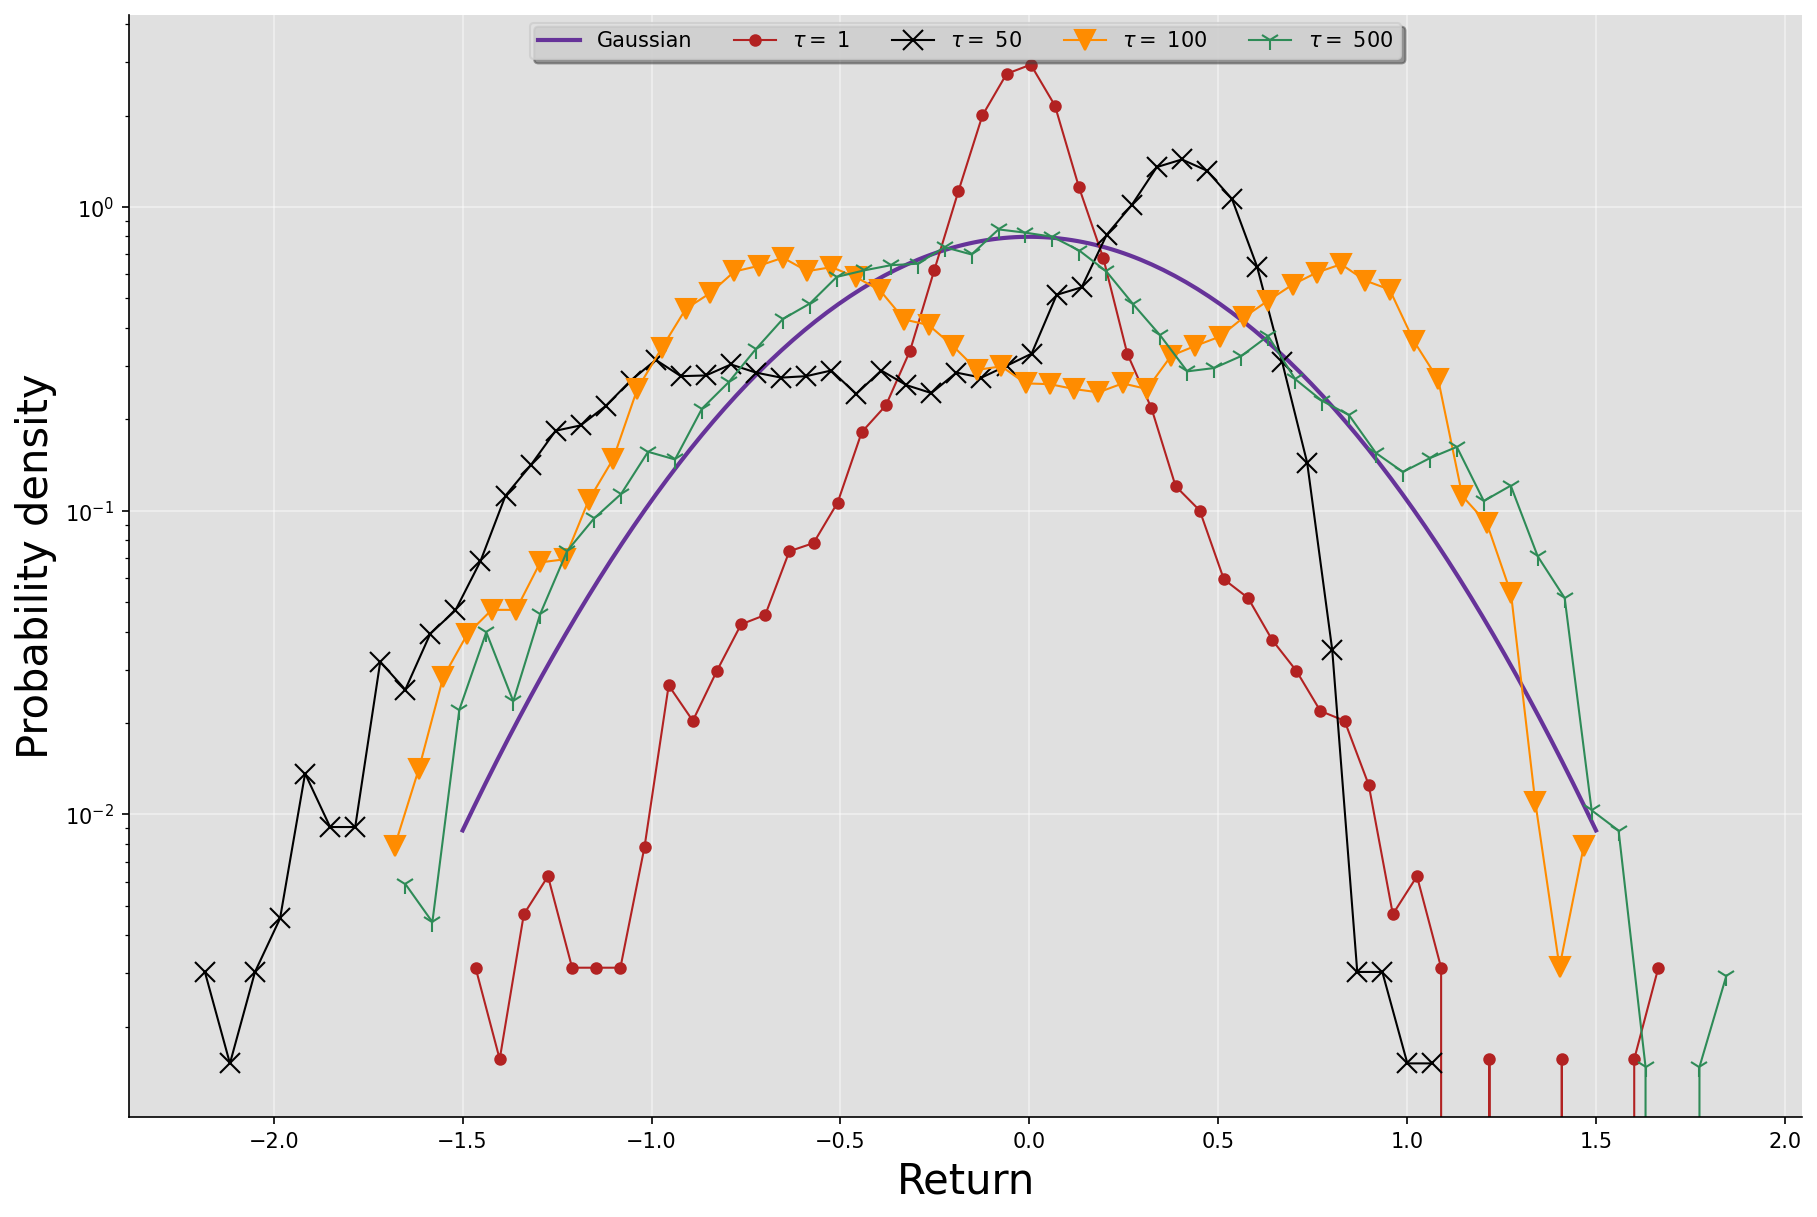

In [2]:
plotter.add_file_name_to_figure_name = False
plotter.add_parameter_text_to_plot = False

plotter.plot_mu_return_different_time(time_period_list=[1, 50, 100, 500], yscale="log")

c:\Users\tobia\Desktop\Skole\masters_project\code\models\common\postprocess.py:515: RuntimeWarning: invalid value encountered in scalar divide
  coeff = scipy.special.gamma((nu + 1.0) / 2.0) / (
c:\Users\tobia\Desktop\Skole\masters_project\code\models\common\postprocess.py:516: RuntimeWarning: overflow encountered in scalar multiply
  np.sqrt(nu * np.pi) * scipy.special.gamma(nu / 2.0)
C:\Users\tobia\Desktop\Skole\general_functions\general_functions\__init__.py:163: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(pdf(x, *par)), axis=sum_axis)
c:\Users\tobia\Desktop\Skole\masters_project\code\models\common\postprocess.py:573: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(nu * np.pi) * scipy.special.gamma(nu / 2.) * sigma
c:\Users\tobia\Desktop\Skole\masters_project\code\models\common\postprocess.py:581: RuntimeWarning: invalid value encountered in power
  power_term = inside ** ( - (nu + 1.) / 2. )


Gaussian: mu = 0.00, sigma = 0.21, 
Student t: nu = 341.89
Location transformed Student t: nu = 2.47, mu = 0.01, sigma = 0.12


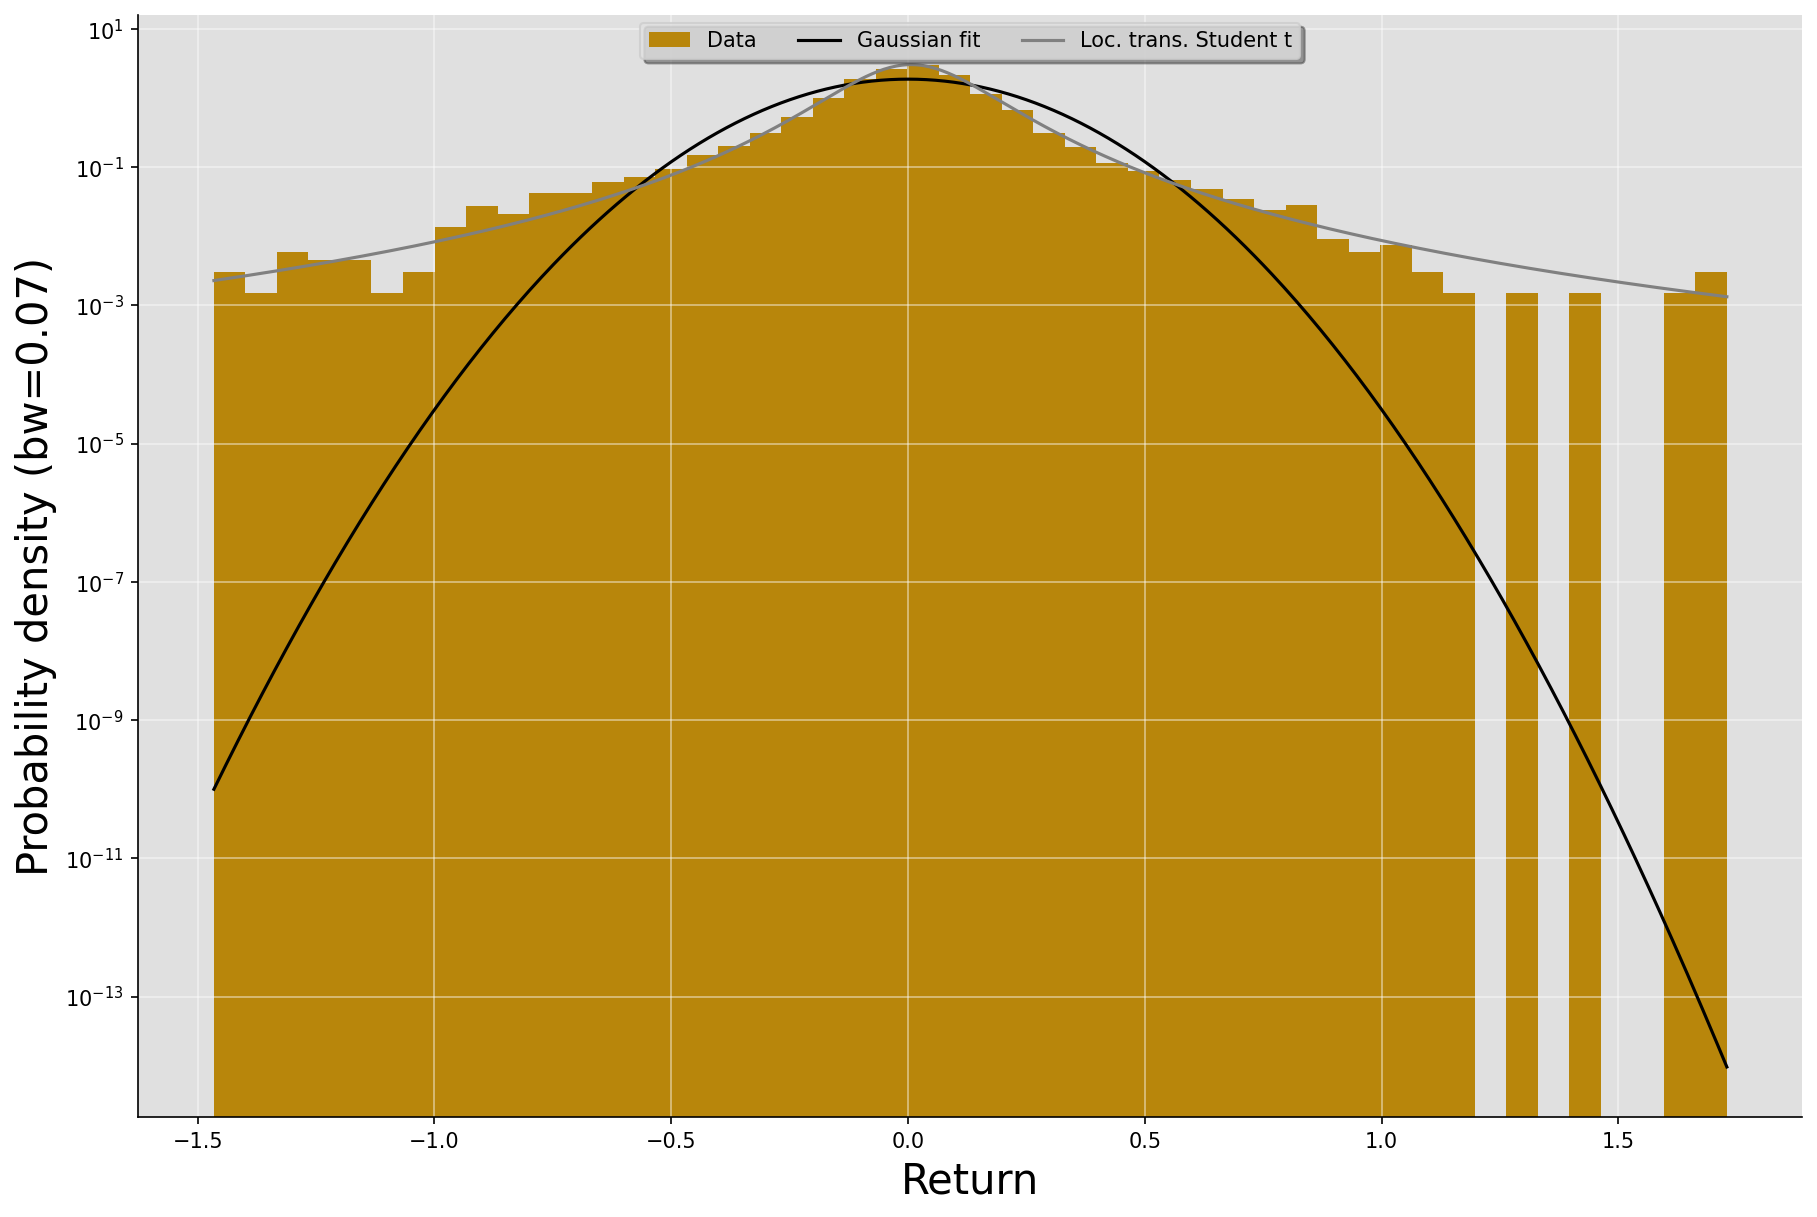

In [8]:
plotter.add_file_name_to_figure_name = False
plotter.add_parameter_text_to_plot = False
# plotter.mu_return(yscale="linear")
plotter.plot_mu_return(yscale="log")

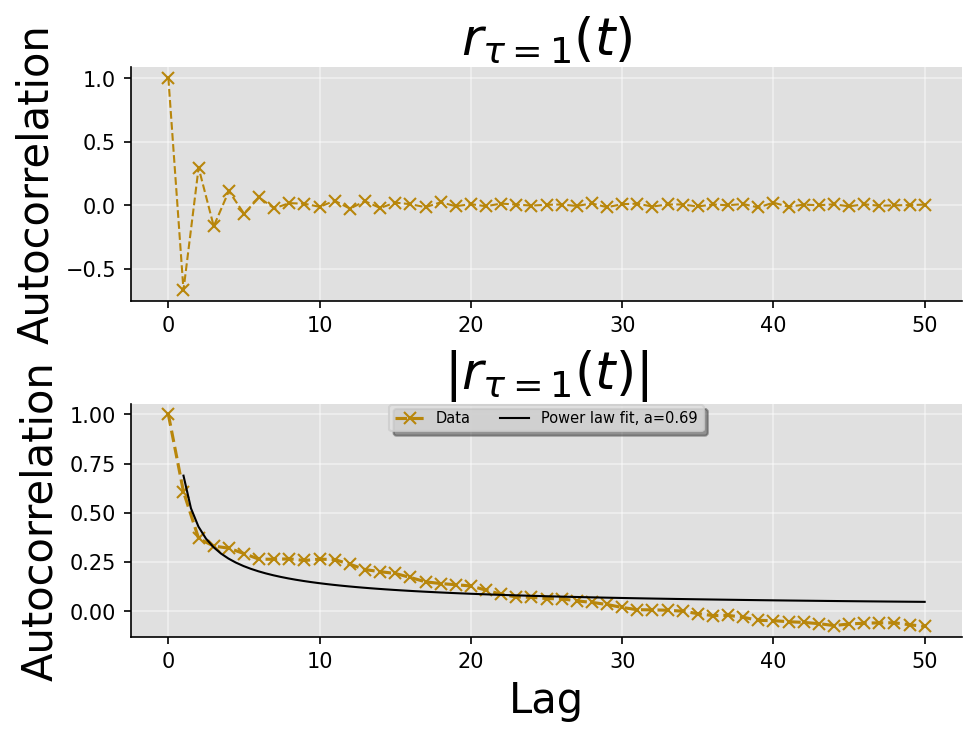

In [10]:
plotter.add_file_name_to_figure_name = False
plotter.add_parameter_text_to_plot = False
plotter.plot_autocorr(max_lag=50, time_period=1)

In [ ]:
plotter.plot_mu_mean_s_diversity()

In [ ]:
plotter.plot_salary_and_debt_distributions()

### Niche behaviour graphs

In [ ]:
plotter.plot_mutations()

In [ ]:
plotter.plot_bankrupt_new_salary()

In [ ]:
plotter.animate_w0_wnon0(skip_time_steps=5);

In [ ]:
plotter.plot_time_from_income_change_to_bankruptcy_distribution(show_plot=False)

In [ ]:
plotter.plot_survivors(show_peak_plot=False)

In [ ]:
plotter.add_parameter_text_to_plot = False
plotter.add_file_name_to_figure_name = False
plotter.plot_diversity()

### Parameter investigations

In [ ]:
# Create all datasets and store them. Does not store group names
# create_data.repeated_m_runs(N_repeat=2, m_values=np.geomspace(1e-1, 1e1, 3))
create_data.multiple_s_min_runs(s_min_list=np.geomspace(1e-8, 5e-2, 8))

In [ ]:
# These should belong to and be imported from a seperate file

# Get group name list
# Mutation size
m_values = [0.1, 0.5, 1, 5, 10, 25, 50, 75, 100]
group_name_list_mutation = []
for m in m_values:
    create_data.mutation_magnitude = m
    create_data.salary_min = m / 10
    group_name_list_mutation.append(create_data._get_group_name())
# Reset m
create_data.mutation_magnitude = mutation_magnitude
create_data.salary_min = salary_min

# Mutation size repeated
N_m_repeat = 10
group_name_list_mutation_arr = np.zeros((len(m_values), N_m_repeat), dtype=object)
seed_arr = np.arange(0, N_m_repeat * len(m_values)).reshape(len(m_values), N_m_repeat)
for i, m in enumerate(m_values):
    for j in range(N_m_repeat):
        create_data._set_seed(seed_arr[i, j])
        create_data.mutation_magnitude = m
        # create_data.salary_min = m / 10
        group_name_list_mutation_arr[i, j] = create_data._get_group_name()
# Reset values
create_data.mutation_magnitude = mutation_magnitude
create_data.salary_min = salary_min
create_data._set_seed(seed=seed)

# Prob exponent
prob_exponent_values = [0, 1, 2, 4, 6, 8]
group_name_list_prob_expo = []
for exponent in prob_exponent_values:
    create_data.prob_exponent = exponent
    group_name_list_prob_expo.append(create_data._get_group_name())
# Reset exponent
create_data.prob_exponent = prob_exponent

# alpha repeated
N_alpha_repeat = 10
group_name_list_alpha_arr = np.zeros((len(prob_exponent_values), N_alpha_repeat), dtype=object)
seed_arr = np.arange(0, N_alpha_repeat * len(prob_exponent_values)).reshape(len(prob_exponent_values), N_alpha_repeat)
for i, alpha in enumerate(prob_exponent_values):
    for j in range(N_alpha_repeat):
        create_data._set_seed(seed_arr[i, j])
        create_data.prob_exponent = alpha
        group_name_list_alpha_arr[i, j] = create_data._get_group_name()
# Reset values
create_data.prob_exponent = prob_exponent
create_data._set_seed(seed=seed)

# ds 
ds_values = np.linspace(0.005, 0.1, 10)
group_name_list_ds = []
for ds in ds_values:
    create_data.ds = ds
    group_name_list_ds.append(create_data._get_group_name())
# Reset ds
create_data.ds = salary_increase


s_min_values = [1e-8, 1e-7, 1e-6, 1e-4, 1e-3, 1e-2]
group_name_list_salary_min = []
for s_min in s_min_values:
    create_data.salary_min = s_min
    group_name_list_salary_min.append(create_data._get_group_name())
# Reset salary_min
create_data.salary_min = salary_min

# N variable, W const
NW_const = 250
NW_variable = np.array([25, 50, 100, 250, 500, 1000])

# Ratio constant N / W
N_W_ratio = 0.75
W_values_ratio = np.round(N_W_ratio * NW_variable, 0).astype(np.int32)

group_name_list_N_var_W_const = []
group_name_list_N_const_W_var = []
group_name_list_N_W_ratio = []

# Run N variable, W constant
create_data.W = NW_const
for N in NW_variable:
    create_data.N = N
    group_name_list_N_var_W_const.append(create_data._get_group_name())

# Run N constant, W variable
create_data.N = NW_const
for W in NW_variable:
    create_data.W = W
    group_name_list_N_const_W_var.append(create_data._get_group_name())

# Run N / W ratio
for N, W in zip(NW_variable, W_values_ratio):
    create_data.N = N
    create_data.W = W
    group_name_list_N_W_ratio.append(create_data._get_group_name())
    
# Reset N and W
create_data.N = number_of_companies
create_data.W = number_of_workers

In [ ]:
# # Store data
# for m in m_values:
#     print("m = ", m)
#     create_data.mutation_magnitude = m
#     # create_data.salary_min = m / 10
#     create_data.store_data_in_group()
# create_data.mutation_magnitude = mutation_magnitude
# create_data.salary_min = salary_min

# Store multiple m data
# for i, m in enumerate(m_values):
#     for j in range(N_m_repeat):
#         print("m = ", m, "repeat = ", i)
#         create_data._set_seed(seed_arr[i, j])
#         create_data.mutation_magnitude = m
#         create_data.salary_min = m / 10
#         create_data.store_data_in_group()

# Store Prob exponent data
for expo in prob_exponent_values:
    print("expo = ", expo) 
    create_data.prob_exponent = expo
    create_data.store_data_in_group()
create_data.prob_exponent = prob_exponent
    
# Store multiple alpha data
for i, alpha in enumerate(prob_exponent_values):
    for j in range(N_alpha_repeat):
        print("alpha = ", alpha, "repeat = ", j)
        create_data._set_seed(seed_arr[i, j])
        create_data.prob_exponent = alpha
        create_data.store_data_in_group()
create_data.prob_exponent = prob_exponent
create_data._set_seed(seed=seed)

# Store ds data
# for ds in ds_values:
#     print(f"ds = {ds:.4f}")
#     create_data.ds = ds
#     create_data.store_data_in_group()
# create_data.ds = salary_increase      

# Store smin data
for s_min in s_min_values:
    print(f"s_min = {s_min:.4f}")
    create_data.salary_min = s_min
    create_data.store_data_in_group()
create_data.salary_min = salary_min

# Store N variable, W const
print("Running N variable, W constant")
create_data.W = NW_const
for N in NW_variable:
    print("N = ", N, "W = ", NW_const)
    create_data.N = N
    create_data.store_data_in_group()

# Store N const, W variable
print("\nRunning N constant, W variable")
print("")
create_data.N = NW_const
for W in NW_variable:
    print("N = ", NW_const, "W = ", W)
    create_data.W = W
    create_data.store_data_in_group()

# Store N / W ratio
print("\nRunning N/W ratio")
for N, W in zip(NW_variable, W_values_ratio):
    print("N = ", N, "W = ", W)
    create_data.N = N
    create_data.W = W
    create_data.store_data_in_group()
create_data.N = number_of_companies
create_data.W = number_of_workers

In [ ]:
def generate_ds_arr_data(ds_vals, N_repeat, store_data=True, alpha=None, N=None, W=None):
    """Store data for different ds values with N_repeat repeats or if store_data=False only return group names.

    Args:
        ds_vals (_type_): _description_
        N_repeat (_type_): _description_

    Returns:
        np.ndarray: Group name arrays for ds values with repeats
    """
    # Set alpha, N and W if given, otherwise they are the default values
    if alpha is not None: create_data.prob_exponent = alpha
    if N is not None: create_data.N = N
    if W is not None: create_data.W = W
    
    # Create seed array
    seed_arr = np.arange(0, N_repeat * len(ds_vals)).reshape(len(ds_vals), N_repeat)
    group_name_arr = np.zeros((len(ds_vals), N_repeat), dtype=object)
    # Loop over ds values, get the gname and then store the data for that gname
    for i, ds in enumerate(ds_vals):
        for j in range(N_repeat):
            create_data._set_seed(seed_arr[i, j])
            create_data.ds = ds
            group_name_arr[i, j] = create_data._get_group_name()
            if store_data: create_data.store_data_in_group(print_info=False)
    
    # Reset values
    create_data.ds = salary_increase
    create_data._set_seed(seed=seed)
    create_data.prob_exponent = prob_exponent
    create_data.N = number_of_companies
    create_data.W = number_of_workers
    
    return group_name_arr


def generate_ds_tensor_data(ds_vals, N_repeat, alpha_vals, N_vals, W_vals, store_data) -> list:
    """Generate data for a tensor of ds values with repeats for each alpha and N, W values. Elementa in N and W are run pairwise together, e.g. N[0], W[0] are run together.

    Args:
        ds_vals (_type_): _description_
        N_repeat (_type_): _description_
        alpha_vals (_type_): _description_
        N_vals (_type_): _description_
        W_vals (_type_): _description_

    Returns:
        list: list of group name arrays
    """
    # Print the total number of iterations
    print(f"Total number of iterations: {len(ds_vals) * len(alpha_vals) * len(N_vals)  * N_repeat}")
    # Create a list to store the group name arrays
    list_of_group_name_arr = []
    for alpha in alpha_vals:
        for N, W in zip(N_vals, W_vals):
            name_arr = generate_ds_arr_data(ds_vals, N_repeat, store_data=store_data, alpha=alpha, N=N, W=W) 
            list_of_group_name_arr.append(name_arr)
    return list_of_group_name_arr


def generate_N_W_arr_data(N_values, ratio_vals, W, number_of_repeats, store_data=True, alpha=None):
    """Store data for three different scenarios: N variable and W constant; N constant and W variable;  N / W ratio.

    Args:
        variable_arr (_type_): The value of either N or W that is varied
        constant_value (_type_): The value of the constant variable
        number_of_repeats (_type_): Number of repeats for each variable value
        store_data (_type_): Whether to store the data or just return the group names
        alpha (_type_): The value of the alpha parameter. If None, use the default value
    Returns:
        np.ndarray: Group name arrays for ds values with repeats
    """
    # Set alpha, N and W if given, otherwise they are the default values
    if alpha is not None: create_data.prob_exponent = alpha
    
    # Create seed array
    seed_arr = np.arange(0, number_of_repeats * len(N_values)).reshape(len(N_values), number_of_repeats)
    N_gname_arr = np.zeros((len(N_values), number_of_repeats), dtype=object)
    ratio_gname_arr = np.zeros_like(N_gname_arr)
    # Loop over ds values, get the gname and then store the data for that gname
    create_data.W = W
    for i, N in enumerate(N_values):
        for j in range(number_of_repeats):
            create_data._set_seed(seed_arr[i, j])
            create_data.N = N
            N_gname_arr[i, j] = create_data._get_group_name()
            if store_data: create_data.store_data_in_group(print_info=False)
    
    for i, ratio in enumerate(ratio_vals):
        for j in range(number_of_repeats):
            create_data._set_seed(seed_arr[i, j])
            create_data.N = N_values[i]
            create_data.W = ratio * N_values[i]
            ratio_gname_arr[i, j] = create_data._get_group_name()
            if store_data: create_data.store_data_in_group(print_info=False)
    
    # Reset values
    create_data._set_seed(seed=seed)
    create_data.prob_exponent = prob_exponent
    create_data.N = number_of_companies
    create_data.W = number_of_workers
    
    return N_gname_arr, ratio_gname_arr

In [ ]:
list_of_group_name_ds_arr = generate_ds_tensor_data(ds_vals=np.linspace(0.005, 0.05, 9), N_repeat=10, 
                                                    alpha_vals=[1, 2, 4], N_vals=[50, 100, 500], W_vals=[250, 500, 2500],
                                                    store_data=True)

In [ ]:
plotter.plot_ds_frequency_multiple_datasets(list_of_group_name_ds_arr, data_name="salary")

In [ ]:
group_name_ds_arr = generate_ds_arr_data(ds_vals=np.linspace(0.005, 0.08, 10), N_repeat=10, store_data=False)
plotter.plot_var_frequency(group_name_ds_arr, var_name="ds", data_name="salary", show_fit_results=True)

In [ ]:
# -- Exponent investigation (alpha) --
plotter.add_parameter_text_to_plot = False
plotter.add_file_name_to_figure_name = False

plotter.plot_multiple_alpha(group_name_list_prob_expo, same_plot=False)
# plotter.plot_alpha_frequency(group_name_list_prob_expo)
# plotter.plot_ds_power_spectrum(group_name_list_prob_expo)
# plotter.plot_min_max_vs_alpha(group_name_list_alpha_arr[:-1], data_name="salary")
# plotter.plot_min_max_vs_alpha(group_name_list_alpha_arr[:-1], data_name="mu")
plotter.plot_diversity_multiple_alpha(group_name_list_prob_expo)

In [ ]:
# -- Mutation size investigation -- 
# plotter.plot_multiple_m(group_name_list_mutation, same_plot=True)
# plotter.plot_m_frequency(group_name_list_mutation)
# plotter.plot_m_power_spectrum(group_name_list_mutation)
plotter.plot_min_max_vs_m(group_name_list_mutation_arr, data_name="salary")


In [ ]:
# -- ds investigation --
# plotter.plot_multiple_ds(group_name_list_ds[4:], same_plot=False)
# plotter.plot_ds_power_spectrum(group_name_list_ds)


plotter.add_parameter_text_to_plot = False
plotter.add_file_name_to_figure_name = False
plotter.plot_var_frequency(group_name_list=group_name_list_ds, var_name="ds", data_name="mu", show_second_dominant_freq=True, points_to_exclude_from_fit=3)
plotter.plot_var_frequency(group_name_list=group_name_list_ds, var_name="ds", data_name="salary", show_second_dominant_freq=True, points_to_exclude_from_fit=1)

In [ ]:
# -- smin -- 
plotter.add_parameter_text_to_plot = False
plotter.add_file_name_to_figure_name = False

# plotter.plot_multiple_s_min(group_name_list_salary_min)
plotter.plot_running_KDE_multiple_s_min(group_name_list_salary_min, bandwidth_s=0.005, s_lim=(1e-8, 0.14), eval_points=200, kernel="epanechnikov", show_mean=False,)


In [ ]:
plotter.plot_N_var_W_const(group_name_list_N_var_W_const)
plotter.plot_N_W_ratio(group_name_list_N_W_ratio)
plotter.plot_N_const_W_var(group_name_list_N_const_W_var)